# Sample code for the workshop


## Reading/downloading text available in various formats

# Wiki dumps for various languages

## Location of the wiki dump

Bengali -  https://dumps.wikimedia.org/bnwiki/latest/bnwiki-latest-pages-articles.xml.bz2

Hindi - https://dumps.wikimedia.org/hiwiki/latest/hiwiki-latest-pages-articles.xml.bz2

Kannada - https://dumps.wikimedia.org/knwiki/latest/knwiki-latest-pages-articles.xml.bz2

Malayalam - https://dumps.wikimedia.org/mlwiki/latest/mlwiki-latest-pages-articles.xml.bz2

Marati - https://dumps.wikimedia.org/mrwiki/latest/mrwiki-latest-pages-articles.xml.bz2

Tamil - https://dumps.wikimedia.org/tawiki/latest/tawiki-latest-pages-articles.xml.bz2

Telugu - https://dumps.wikimedia.org/tewiki/latest/tewiki-latest-pages-articles.xml.bz2

For any other language, replace the first two characters of the file name with the ISO code of that language

### Use a bz2 extractor to extract XML dump of the articles 

# use the following sample code to extract the dump

Note: Intially try with 100 articles from the dump before extracting the entire XML data set

In [1]:
# Helper code
%pip install wget
from pathlib import Path
import wget
import bz2


def get_corpus_folder():
    home = get_home_dir()
    return  home + '/Teaching/IITMDS/Corpora/'

def get_home_dir():
    return str(Path.home())    


def download_wiki(language_code, remote_url):
    print('downloading...')
    local_file = get_corpus_folder() + language_code + 'Wiki.bz2'
    wget.download(remote_url, local_file)
    print('Download Complete')
    return local_file

def download_file(language_code, remote_url):
    print('Download started')
    req = requests.get(remote_url)
 
    # Split URL to get the file name
    filename = remote_url.split('/')[-1]
    local_file = get_corpus_folder() + filename

    # Writing the file to the local file system
    with open(local_file,'wb') as output_file:
        output_file.write(req.content)
        
    print('Download Completed')
    print(local_file)
    return local_file
    
def uncompress_bz2(language_code, bz2_filename):
    print('Uncompress started')
    corpus_filename = get_corpus_folder() + language_code + 'Wiki.txt'
    with bz2.open(bz2_filename, "rb") as f:
        # Decompress data from file
        content = f.read()
        output = open(corpus_filename, 'w', encoding='utf-8')
        output.write(content.decode(encoding='utf-8'))
        f.close()
    print('Completed')
    return corpus_filename    


Note: you may need to restart the kernel to use updated packages.


%pip install wiki_dump_reader

from wiki_dump_reader import Cleaner, iterate
from pathlib import Path
import requests

#https://github.com/CyberZHG/wiki-dump-reader
#pip install wiki-dump-reader
#Code adapted from https://github.com/CyberZHG/wiki-dump-reader
def create_corpus_for_language(language_code):

    # corpus_file = '<your_Folder/CorpusFileName.txt'
    corpus_filename = get_corpus_folder() + language_code + 'Wiki.txt'
    page_count = 0
    cleaner = Cleaner()
    with open(corpus_filename, 'w', encoding='utf-8') as output:
       # for title, text in iterate('/LocationOfYourContent/XXwiki-latest-pages-articles.xml'):
        for title, text in iterate(get_home_dir() + '/Downloads/' + language_code + 'wiki-latest-pages-articles.xml'):
            text = cleaner.clean_text(text)
            cleaned_text, links = cleaner.build_links(text)
            output.write(title + '\n' + cleaned_text + '\n')
            page_count += 1
            if page_count % 50 == 0:
                print('Pages dumped = ', page_count)
            # For demo purposes, the execution is stopped after 5 pages
            if page_count > 100:
                break
    output.close()


language_code = 'bn'
local_bz2_file = download_file('bn',"https://dumps.wikimedia.org/bnwiki/latest/bnwiki-latest-pages-articles.xml.bz2")
uncompress_bz2(language_code, local_bz2_file)
#create_corpus_for_language(language_code)
#file = open(get_corpus_folder() + language_code + 'Wiki.txt','r', encoding='utf-8')
#print(file.read())

In [4]:
## Exrtaction of text from a json corpus
### Corpus compiled in JSON format
### JSON schema of full text documents of COVID Corpus
### This JSON formated text is extracted from PDF files

### Code for extracting text from the JSON 
### the schema is given above

In [5]:
import json


def extract_text_from_json_file(filename):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
        
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if availabledef extract_text(filename):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
        
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, i
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']


   
    return (title + ' ' + abstract + ' ' + body_text + ' ').lower()

In [11]:
from base64 import decode


txt_dump = extract_text_from_json_file(get_corpus_folder()+'covid_paper_sample.json')

f = open(get_corpus_folder() + 'sample.txt', 'w',encoding='utf-8')
f.write(txt_dump)
f.close()

## Upload/read corpus 


In [19]:
# read the corpus

fd = open(get_corpus_folder() + 'covid19_partial.txt', encoding='utf-8' )
covid19_corpus = fd.read()
# Create tokens out of the corpus
import nltk
import re
import string
nltk.download('punkt')

#remove numbers
pp_text = re.sub(r'\d+', '', covid19_corpus)

#tokenize
tokens = nltk.word_tokenize(pp_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Counting
### Number of Tokens in the Corpus

In [20]:
number_of_tokens = len(tokens)
print('Total number of tokens is {}'.format(number_of_tokens))

Total number of tokens is 167474


## Vocabulary of the corpus


In [21]:
vocabulary = list(set(tokens))
print('The number of words in the vocabulary is {}'.format(len(vocabulary)))

The number of words in the vocabulary is 8841


## Frequency of words


In [22]:
from collections import Counter

token_frequency = Counter()
token_frequency.update(Counter(tokens))

In [23]:
# print top 20 high frequency words
token_frequency.most_common()[:20]

[('the', 9138),
 ('of', 6176),
 ('and', 5398),
 ('to', 3884),
 ('in', 3866),
 ('a', 2732),
 ('for', 1756),
 ('with', 1656),
 ('is', 1564),
 ('as', 1258),
 ('that', 1120),
 ('are', 1096),
 ('be', 1096),
 ('were', 1076),
 ('was', 980),
 ('by', 936),
 ('on', 922),
 ('this', 830),
 ('or', 826),
 ('at', 740)]

In [24]:
# print 20 low frequency words
token_frequency.most_common()[-21:-1]

[('roche', 2),
 ('saponin', 2),
 ('applying', 2),
 ('proceed', 2),
 ('digested', 2),
 ('tryptic', 2),
 ('lc-msms', 2),
 ('calculate', 2),
 ('differed', 2),
 ('org', 2),
 ('panther', 2),
 ('evolutionary', 2),
 ('somewhat', 2),
 ('cyt-', 2),
 ('apparatus-', 2),
 ('mitochondrial-and', 2),
 ('endosomal-localized', 2),
 ('organelles', 2),
 ('annotated', 2),
 ('depleted', 2)]

## Heaps Law

### The estimated vocabulary size is proportional to the total number of tokens in the corpus
$$\begin{align}
M &\propto T^{\beta}\\ 
M &= \kappa T^\beta\ \end{align}$$

### We can rewrite the above equation as
$$\begin{align}
\log(M) &= \log(\kappa) + \beta \times \log(T) \end{align}$$

### where  is the estimated vocabulary,  is the total number of tokens and  is a constant.  is usually between  and 
### If you consider two words whose frequency and rank are known. 
### Is it possible to find the alpha value?
#

### Find out vocabulary for every 1000 words
### Divide the entire tokens in to a list of 1000 word tokens

In [25]:
vocabulary = {}
token_count = 0
vocab_count = 0

token_list=[]
vocab_list=[]

for token in tokens:
    if token in vocabulary:
        vocabulary[token] += 1
        token_count +=1
    else:
        vocabulary[token] = 1
        token_count +=1
        vocab_count +=1

    if token_count%1000==0:
        token_list.append(token_count)
        vocab_list.append(vocab_count)

print('Token_count:', token_count)
print('Vocab_count:', vocab_count)

Token_count: 167474
Vocab_count: 8841


### To find $\beta$ and $k$, convert the list into log values

In [26]:
import numpy as np
log_t = np.log(token_list)
log_v = np.log(vocab_list)

### To demonstrate, we use the first two values for the estimation of $\beta$ and $k$

In [27]:
b = (log_v[1] - log_v[0]) / (log_t[1] - log_t[0])
log_k = log_v[1] - b * log_t[1]

print("b = ", b,", log(k) = ",log_k)

b =  0.6978158404110515 , log(k) =  1.1224583197699038


### Now, estimate the vocabulary using Heap's law


In [29]:
heaps_vocab_estimate = []

for i in log_t:
    heaps_vocab_estimate.append(log_k + b * i)

Note: you may need to restart the kernel to use updated packages.


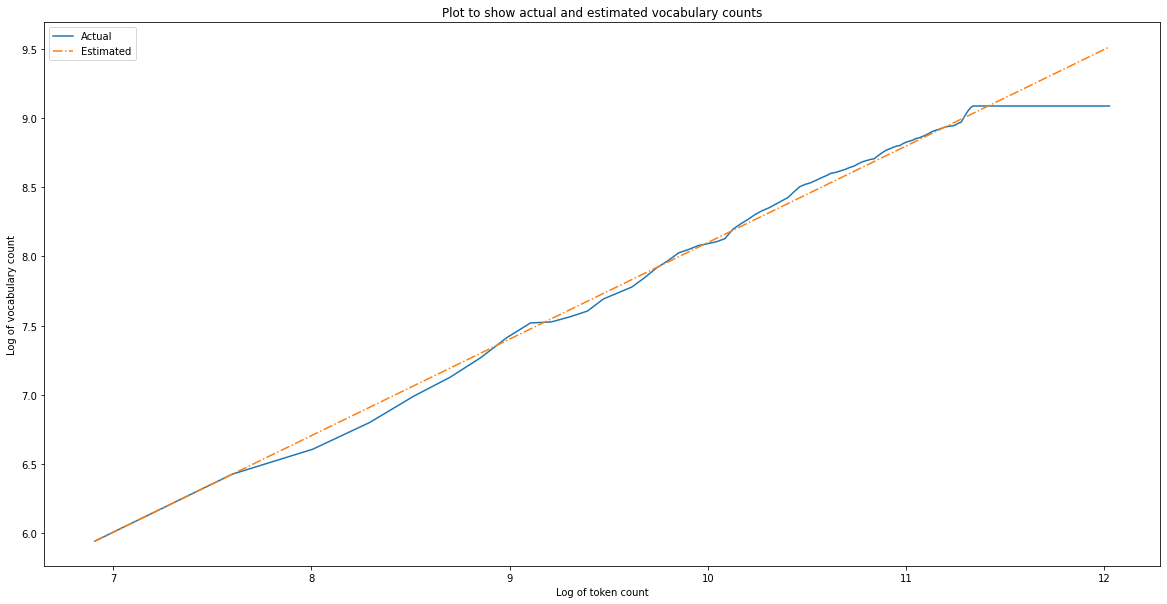

In [33]:
%pip install matplotlib  
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(log_t, log_v, label = "Actual")
plt.plot(log_t, heaps_vocab_estimate, label = "Estimated", linestyle='dashdot')
plt.xlabel("Log of token count")
plt.ylabel("Log of vocabulary count")
plt.title("Plot to show actual and estimated vocabulary counts")

plt.legend()

plt.show()

### Application of Heaps Law


In [36]:
import nltk
nltk.download('stopwords')
nltk.download('gutenberg')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [37]:
from nltk.corpus import stopwords
#get the stop words for English
stop_words = set(stopwords.words('english'))
words_bryant = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))
words_emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
#convert to small letters
words_bryant = [word.lower() for word in words_bryant if word.isalpha()]
words_emma = [word.lower() for word in words_emma if word.isalpha()]
#remove stop words
words_bryant = [word.lower() for word in words_bryant if word not in stop_words][:15000]
words_emma = [word.lower() for word in words_emma if word not in stop_words][:15000]
TTR_bryant = len(set(words_bryant))/len(words_bryant)
TTR_emma = len(set(words_emma))/len(words_emma)
print('Number of tokens, Vocabulary, Type-token ratio (Bryant stories) = ', len(words_bryant), len(set(words_bryant)), TTR_bryant)
print('Number of tokens, Vocabulary, Type-token ratio (Jane Austen Emma) = ', len(words_emma), len(set(words_emma)), TTR_emma)

Number of tokens, Vocabulary, Type-token ratio (Bryant stories) =  15000 2796 0.1864
Number of tokens, Vocabulary, Type-token ratio (Jane Austen Emma) =  15000 3274 0.21826666666666666



### According to Zipf's law, the frequency of the word is inversely proportional to its rank.
#### $$\begin{align}
f_w &\propto \frac{1}{r^{\alpha}} \\ 
f_w &= \kappa \frac{1}{r^{\alpha}}\\ 
f_w\times r^{\alpha} &= \kappa \end{align}$$

where $\kappa$ is a constant,  $f$ is the frequency of a word, and $r$ is its rank.
Here $\alpha$ is usually between 0.9 and 1.0
#

In [38]:
### Plotting the frequency and rank


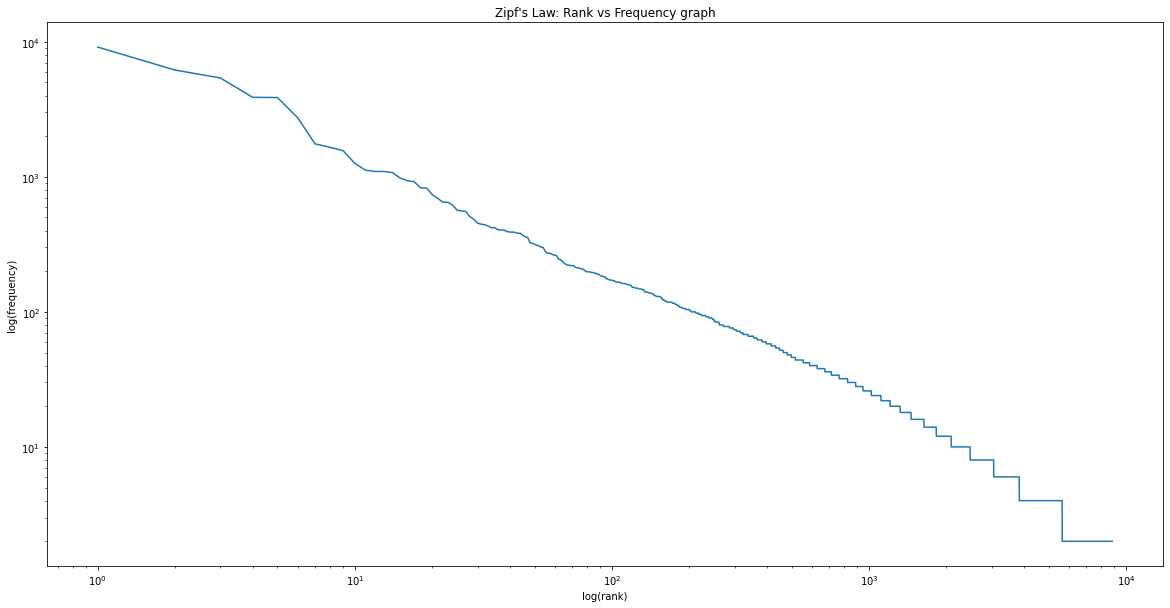

In [39]:
from operator import itemgetter
v = {}
for key, value in reversed(sorted(token_frequency.items(), key = itemgetter(1))):
    v[key] = value
    
# Plotting Zipf's Law
import matplotlib.pyplot as plt
import math

#Getting the values needed to plot
#You may use the RHS values in the plotting function directly
n = len(v.keys())
y = list(v.values())
x = list(range(1, n+1))
 
plt.plot(x, y)
 
#choosing log scale
plt.rcParams["figure.figsize"] = (20,10)

plt.yscale("log")
plt.xscale("log")

# naming the x axis
plt.ylabel('log(frequency)')
# naming the y axis
plt.xlabel('log(rank)')
 

plt.title("Zipf's Law: Rank vs Frequency graph")

#If you want to save the plot, use the next instruction
#plt.savefig("zipfs190522.png") 

# function to show the plot
plt.show()

### Exercise for you to try. How do you estimate the $\alpha$ value using the drequency and rank?
Hint: $k$ is a constant :)

### Term frequency


In [41]:
normalized_tf = {key: value/number_of_tokens for key, value in token_frequency.items()}
list(normalized_tf.items())[:15]

[('the', 0.05456369346883695),
 ('first', 0.0009076035683150817),
 ('step', 0.00011942152214672128),
 ('in', 0.023084180230961225),
 ('fighting', 8.359506550270489e-05),
 ('epidemic', 0.00011942152214672128),
 ('was', 0.005851654585189343),
 ('nationwide', 9.553721771737702e-05),
 ('lock', 2.3884304429344255e-05),
 ('down', 0.00011942152214672128),
 ('on', 0.0055053321709638515),
 ('march', 0.00023884304429344256),
 ('th', 0.000465743936372213),
 ('such', 0.001862975745488852),
 ('a', 0.016312979925242128)]

## Lemmatization
### Uses context to convert word into a meaningful form :)

In [45]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') # open multi-lingual wordnet
from nltk import WordNetLemmatizer

# Function to lemmatize the corpus and return lemmatized words (original and the lemmatized)
def lemmatizer(s):

    
    #Initialize the lemmatizer
    lemmatize = WordNetLemmatizer()
    
    #store the stemmed words in the dictionary
    lem_tokens = {}
    
    # Lemmatize all tokens
    for token in tokens:
        lem_token = lemmatize.lemmatize(token)
        if lem_token != token:
            lem_tokens[token] = lem_token
    return lem_tokens

lemmatized_tokens = lemmatizer(covid19_corpus)

# List N lemmatized tokens
list(lemmatized_tokens.items())[:15]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hayagreev\AppData\Roaming\nltk_data...


[('was', 'wa'),
 ('results', 'result'),
 ('has', 'ha'),
 ('surgeons', 'surgeon'),
 ('hospitals', 'hospital'),
 ('studies', 'study'),
 ('diseases', 'disease'),
 ('patients', 'patient'),
 ('emergencies', 'emergency'),
 ('malignancies', 'malignancy'),
 ('pathologies', 'pathology'),
 ('infections', 'infection'),
 ('departments', 'department'),
 ('disorders', 'disorder'),
 ('lesions', 'lesion')]

## Stemming
### Algorithm to Remove suffixes

In [46]:
from nltk.stem import PorterStemmer

def stemmer(s):

    #initialize the Porter Stemmer
    ps = PorterStemmer()

    #store all the stemmed tokens in this dictionary
    stemmed_tokens = {}
    
    # stem all tokens
    for token in tokens:
        stemmed_token = ps.stem(token)
        if stemmed_token != token:
            stemmed_tokens[token] = stemmed_token
    return stemmed_tokens

stem_tokens = stemmer(tokens)

list(stem_tokens.items())[100:115]

[('according', 'accord'),
 ('statistics', 'statist'),
 ('editing', 'edit'),
 ('country', 'countri'),
 ('affected', 'affect'),
 ('cases', 'case'),
 ('rates', 'rate'),
 ('rising', 'rise'),
 ('remains', 'remain'),
 ('position', 'posit'),
 ('advantage', 'advantag'),
 ('since', 'sinc'),
 ('worldwide', 'worldwid'),
 ('multidisciplinary', 'multidisciplinari'),
 ('repurposed', 'repurpos')]